In [57]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
df = pd.read_csv("data/athletes.csv")
print(df.columns)

Index(['id', 'age', 'gender', 'activities', 'bike', 'run', 'swim', 'other',
       '1s_critical_power', '15s_critical_power', '2m_critical_power',
       '3m_critical_power', '5m_critical_power', '8m_critical_power',
       '10m_critical_power', '20m_critical_power', '30m_critical_power',
       '1m_peak_wpk', '5m_peak_wpk', '10m_peak_wpk', '20m_peak_wpk',
       '30m_peak_wpk', '20s_peak', '20s_peak_wpk', '60s_peak', '60s_peak_wpk',
       '180s_peak', '180s_peak_wpk', '240s_peak', '240s_peak_wpk', '420s_peak',
       '420s_peak_wpk', '720s_peak', '720s_peak_wpk', 'weightkg',
       ' weightstd'],
      dtype='object')


In [450]:
values = df[["1s_critical_power",'15s_critical_power', '2m_critical_power','3m_critical_power', '5m_critical_power', '8m_critical_power','10m_critical_power', '20m_critical_power', '30m_critical_power']]
#x = [1,5,15,30,60,60*5,60*10,20*60]
x = [1,5,10,15,30,60,60*5,60*10,20*60]
#values = df[['1s_critical_power','20s_peak', '60s_peak','180s_peak', '240s_peak', '420s_peak','720s_peak']]
x2 = [1,15,120,180,300,480,600,1200,1800]
#x2= [1,5,15,60, 60*5, 60*10, 60*20]
p1 = values.iloc[180,:]
print(p1)


#p1 = [1362,1297,1149,854,740,494,452,406]#Van Der Poel Puncheur

p1 = [1470,1422,1266,1025,779,698,488,408,387]


p2 = [1021,910,590,556,507,501,484,424,382]# Filippo Ganna Time trialist

#p2 = [951, 732, 646,558, 544, 526, 431]

1s_critical_power     806.00000
15s_critical_power    617.33333
2m_critical_power     317.27500
3m_critical_power     303.60000
5m_critical_power     297.18333
8m_critical_power     272.70208
10m_critical_power    270.21667
20m_critical_power    268.05750
30m_critical_power    251.78333
Name: 180, dtype: float64


In [451]:
startPmax = 1000
startW = 10000
startCP =200
startA =30
startCPmax=1800

MaxTime = 7200


In [452]:
def func(x,W1,Pmax, CP, A, cpmax):
    y = (W1/x*(1-np.exp(-x/(W1/(Pmax-CP)))) + CP - A*(np.log(x/cpmax))*(x>cpmax))
    return y

w1, pmax, cp, a, cpmax = scipy.optimize.curve_fit(func, xdata = x, ydata=p1, p0 = [startW,startPmax,startCP,startA,startCPmax], bounds = ([0,0,0,0,0],[np.inf,np.inf,np.inf,np.inf,np.inf]),maxfev=50000)[0]

w2, pmax2, cp2, a2, cpmax2 = scipy.optimize.curve_fit(func, xdata = x2, ydata=p2, p0 = [startW,startPmax,startCP,startA,startCPmax], bounds = ([0,0,0,0,0],[np.inf,np.inf,np.inf,np.inf,np.inf]),maxfev=500000)[0]

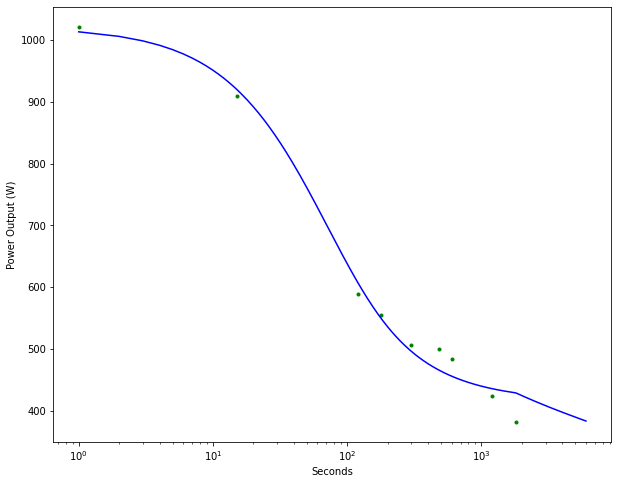

385.16638868728205


In [454]:
pred1 = []
pred2 = []
totl = []
for i in range(1,6000):
    pred1.append(func(i,w1, pmax, cp, a, cpmax))
    pred2.append(func(i,w2, pmax2, cp2, a2, cpmax2))
    totl.append(i)

plt.figure(figsize = (10,8))
#plt.plot(x, p1, 'b.')
plt.plot(x2, p2, 'g.')
#plt.plot(totl, pred1, 'r')
plt.plot(totl, pred2, 'b')
plt.xlabel('Seconds')
plt.ylabel('Power Output (W)')
plt.xscale('log')
plt.show()
print(func(3600,w1, pmax, cp, a, cpmax))

In [449]:

def diff(time,power):
    yt = func(time,w1,pmax,cp,a,cpmax)
    return (yt - power )**2

power = 500 ## Put the power you want the time of here
res = (scipy.optimize.minimize(diff, 1, args=(power), method='Nelder-Mead', tol=1e-6))

In [410]:
res.x[0]

220.02540893554723